In [19]:
import pandas as pd
import numpy as np
import researchpy as rp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
df = pd.read_csv("dispers2.csv", delimiter=';')
df.head()

,Effect,reklama
0,64,Реклама1
1,62,Реклама1
2,42,Реклама1
3,65,Реклама1
4,66,Реклама1


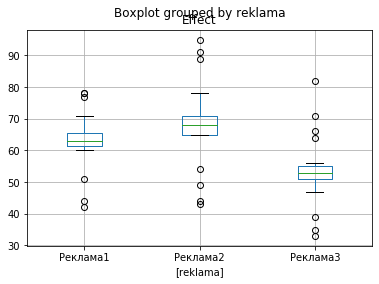

In [20]:
boxplot = df.boxplot(by='reklama') 
plt.show()

In [24]:
print(rp.summary_cont(df['Effect'].groupby(df['reklama'])))
import scipy.stats as stats



           N     Mean       SD      SE  95% Conf.  Interval
reklama                                                    
Реклама1  31  63.3871   7.8046  1.4017    60.5243   66.2498
Реклама2  27  68.1481  11.9057  2.2913    63.4384   72.8579
Реклама3  32  53.3750   9.0545  1.6006    50.1105   56.6395


In [25]:
import scipy.stats as stats
stats.shapiro(df['Effect'])

(0.9783300757408142, 0.13788796961307526)

In [27]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
model = ols('Effect ~ reklama', data=df).fit() 
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
reklama,3410.859976,2.0,18.421601,2.133771e-07
Residual,8054.262246,87.0,NaN,NaN


In [31]:
import statsmodels.stats.multicomp as mc 
comp = mc.MultiComparison(df['Effect'], df['reklama']) 
post_hoc_res = comp.tukeyhsd() 
print(str(post_hoc_res._results_table))

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
Реклама1 Реклама2   4.7611 0.1508  -1.2786 10.8007  False
Реклама1 Реклама3 -10.0121  0.001 -15.7941 -4.2301   True
Реклама2 Реклама3 -14.7731  0.001 -20.7687 -8.7776   True
---------------------------------------------------------
